Confusion Matrix:
[[782   3]
 [294 289]]

Accuracy:  0.7829
Precision: 0.9897
Recall:    0.4957
F1-Score:  0.6606


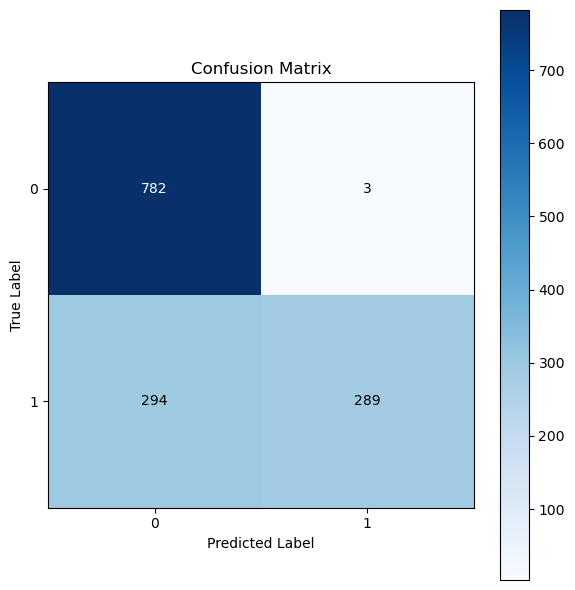

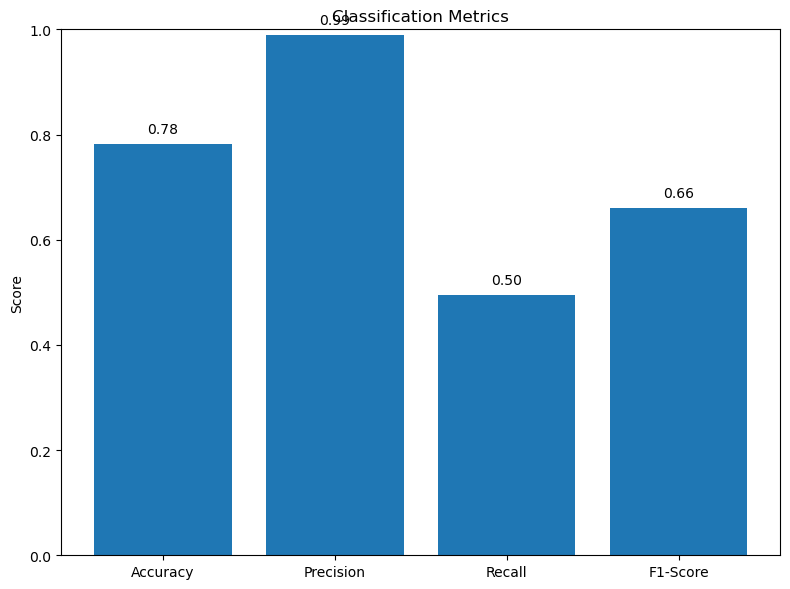

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# 1) Load CSV
df = pd.read_csv('classified_tweets.csv')

# 2) Clean up classification & confidence columns:
#    - split off the prefix
#    - convert to numeric
df['classification'] = (
    df['classification']
      .astype(str)
      .str.split()       # ["1.", "1"] → pick last
      .str[-1]
      .astype(int)
)
df['confidence'] = (
    df['confidence']
      .astype(str)
      .str.split()       # ["2.", "0.85"] → pick last
      .str[-1]
      .astype(float)
)

# 3) Compute metrics
y_true = df['true_label']
y_pred = df['classification']

conf_mat  = confusion_matrix(y_true, y_pred)
accuracy  = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall    = recall_score(y_true, y_pred)
f1        = f1_score(y_true, y_pred)

# 4) Print results
print("Confusion Matrix:")
print(conf_mat)
print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# 5) Plot Confusion Matrix
plt.figure(figsize=(6,6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ['0','1'])
plt.yticks(ticks, ['0','1'])
thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, conf_mat[i, j],
                 ha='center',
                 va='center',
                 color='white' if conf_mat[i, j] > thresh else 'black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# 6) Plot Metrics Bar Chart
metrics = {
    'Accuracy':  accuracy,
    'Precision': precision,
    'Recall':    recall,
    'F1-Score':  f1
}

plt.figure(figsize=(8,6))
bars = plt.bar(metrics.keys(), metrics.values())
plt.ylim(0,1)
plt.title('Classification Metrics')
plt.ylabel('Score')

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.02,
             f"{h:.2f}", ha='center')

plt.tight_layout()
plt.show()
